## Polynomial Linear Regression

**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Importing Dataset**

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values #creating matrix of feature, just need second column because first and second column are redundent
y = dataset.iloc[:, -1].values  #creating dependent variable vector

**Splitting Dataset into Train and Test Sets**

Due to the small size of dataset, splitting the data will not be necessary as the goal is to find one certain value

**Feature Scaling(if necessary)**

Feature scaling is not necessary

**Training Test Sets**

Training useing Simple Linear Regression

In [3]:
regressor_simple = LinearRegression()
regressor_simple.fit(X, y)  #Train the model with data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Training using Polynomial Linear Regression

In [4]:
#First build a matrix of X features to come up with best polynomial equation using PolynomialFeature class
poly_reg_deg2 = PolynomialFeatures(degree=2) #the degree is the degree power of x2 within eqation
poly_reg_deg3 = PolynomialFeatures(degree=3) #the degree is the degree power of x3 within eqation
poly_reg_deg4 = PolynomialFeatures(degree=4) #the degree is the degree power of x4 within eqation

X_poly_deg2 = poly_reg_deg2.fit_transform(X) #transform into matrix of feature with x1 and x1^2
X_poly_deg3 = poly_reg_deg3.fit_transform(X) #transform into matrix of feature with x1 and x1^2 and x^3
X_poly_deg4 = poly_reg_deg4.fit_transform(X) #transform into matrix of feature with x1 and x1^2 and x^3 and x^4

#Build polynomial models
regressor_poly_deg2 = LinearRegression()
regressor_poly_deg2.fit(X_poly_deg2, y)

regressor_poly_deg3 = LinearRegression()
regressor_poly_deg3.fit(X_poly_deg3, y)

regressor_poly_deg4 = LinearRegression()
regressor_poly_deg4.fit(X_poly_deg4, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Visualize Simple Linear results**

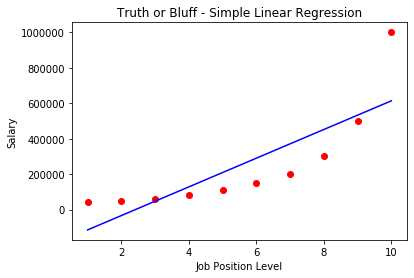

In [5]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor_simple.predict(X), color='blue')
plt.title('Truth or Bluff - Simple Linear Regression')
plt.xlabel('Job Position Level')
plt.ylabel('Salary')
plt.show()

**Visualize Polynomial Linear Regression results**

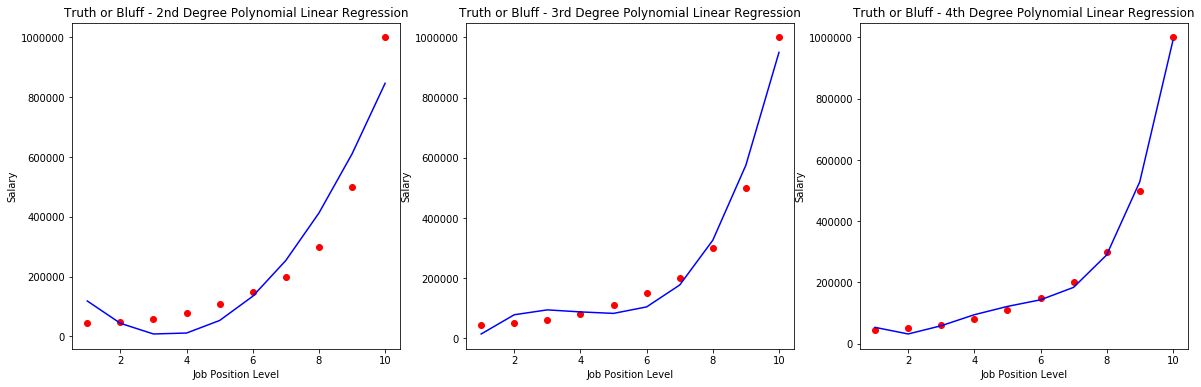

In [12]:
fig = plt.figure(figsize = (20,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(X, y, color='red')
ax1.plot(X, regressor_poly_deg2.predict(X_poly_deg2), color='blue') #Poly regressor needs to be applied to new transformed X matrix
ax1.set_title('Truth or Bluff - 2nd Degree Polynomial Linear Regression')
ax1.set_xlabel('Job Position Level')
ax1.set_ylabel('Salary')

ax2.scatter(X, y, color='red')
ax2.plot(X, regressor_poly_deg3.predict(X_poly_deg3), color='blue') #Poly regressor needs to be applied to new transformed X matrix
ax2.set_title('Truth or Bluff - 3rd Degree Polynomial Linear Regression')
ax2.set_xlabel('Job Position Level')
ax2.set_ylabel('Salary')

ax3.scatter(X, y, color='red')
ax3.plot(X, regressor_poly_deg4.predict(X_poly_deg4), color='blue') #Poly regressor needs to be applied to new transformed X matrix
ax3.set_title('Truth or Bluff - 4th Degree Polynomial Linear Regression')
ax3.set_xlabel('Job Position Level')
ax3.set_ylabel('Salary')

plt.show()


*NOTE: The 4th degree is OVERFITTING the data, but in this instance, that is okay because we are looking for a particular instance within the curve*

**Predicting a result with Simple Linear Regression**

In [15]:
print(f'Salary at last job: ${regressor_simple.predict([[6.5]])[0]}')

Salary at last job: $330378.7878787879


**Predicting a result with Polynomial Linear Regression**

In [28]:
print(f'Salary at last job: ${regressor_poly_deg2.predict(poly_reg_deg2.fit_transform([[6.5]]))}')
print(f'Salary at last job: ${regressor_poly_deg3.predict(poly_reg_deg3.fit_transform([[6.5]]))}')
print(f'Salary at last job: ${regressor_poly_deg4.predict(poly_reg_deg4.fit_transform([[6.5]]))}')

Salary at last job: $[189498.10606061]
Salary at last job: $[133259.46969697]
Salary at last job: $[158862.45265153]
